### Trends and Conclusions
* There is a total of 159 tweets with a zero compound score. When looking at the dataframe created, we can see that most of those tweets had also a negative score of 1 (and both positive and neutral zeros). With that, an overall analysis excluding the zeros sounds more reliable than if we keep the zeros. Both bar charts were created and the conclusions are below.
* One important note is that this mood analysis is really sensitive to time and it might change significantly depending on time its executed. Below results are for August 31st at 5 PM.
* The overall sentiment bar chart shows that BBS and CBS tend to be more negative in their news, while remaining 3 news organizations (CNN, Fox and NY Times) tend to be more positive.
* By removing the zero compound scores we can see that the conclusion is the same, however the numbers evidence the difference a little more. This is a better result to use in a presentation as it consider only valid scores (assuming zero is not valid).

In [4]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Search Term
target_terms = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List to hold results
news_tweets = []

# Loop through all target users
for target in target_terms:

    # Counter
    counter = 1

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1
            
            # Add sentiments for each tweet into a list
            news_tweets.append({"Account": target,
                                "Date": tweet["created_at"], 
                                "Tweet": tweet["text"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neu,
                                "Neutral": neg,
                                "Tweets Ago": counter})
        
            # Add to counter 
            counter += 1

In [6]:
# Convert tweets to DataFrame and save in a CSV file
news_pd = pd.DataFrame.from_dict(news_tweets)
news_pd.to_csv("Output/news_mood.csv", index=False)
news_pd.head()

,Account,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago
0,@BBCWorld,-0.7650,Thu Sep 27 21:30:21 +0000 2018,0.548,0.452,0.000,Brett Kavanaugh denies Christine Blasey Ford s...,1
1,@BBCWorld,0.6124,Thu Sep 27 21:02:24 +0000 2018,0.530,0.152,0.318,"""This is not a job interview, this is hell"" - ...",2
2,@BBCWorld,-0.5859,Thu Sep 27 20:52:01 +0000 2018,0.758,0.242,0.000,Tense exchanges as Brett Kavanaugh faces quest...,3
3,@BBCWorld,-0.5859,Thu Sep 27 20:30:11 +0000 2018,0.647,0.259,0.095,RT @BBCBreaking: Tesla chief executive Elon Mu...,4
4,@BBCWorld,-0.5859,Thu Sep 27 20:28:18 +0000 2018,0.703,0.297,0.000,RT @BBCBusiness: US regulator alleges Elon Mus...,5


In [7]:
len(news_pd.loc[news_pd["Compound"] == 0 , :])

168

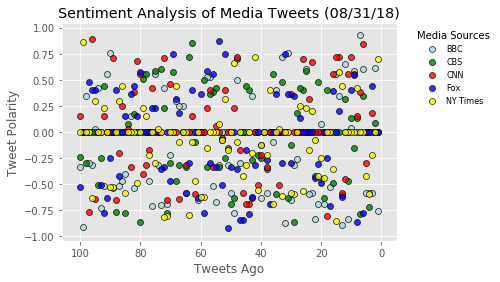

In [8]:
# Obtain the x and y coordinates for each news organizations
y1 = news_pd.loc[news_pd["Account"] == "@BBCWorld" , ["Compound"]]
x1 = news_pd.loc[news_pd["Account"] == "@BBCWorld" , ["Tweets Ago"]]
y2 = news_pd.loc[news_pd["Account"] == "@CBSNews" , ["Compound"]]
x2 = news_pd.loc[news_pd["Account"] == "@CBSNews" , ["Tweets Ago"]]

y3 = news_pd.loc[news_pd["Account"] == "@CNN" , ["Compound"]]
x3 = news_pd.loc[news_pd["Account"] == "@CNN" , ["Tweets Ago"]]
y4 = news_pd.loc[news_pd["Account"] == "@FoxNews" , ["Compound"]]
x4 = news_pd.loc[news_pd["Account"] == "@FoxNews" , ["Tweets Ago"]]
y5 = news_pd.loc[news_pd["Account"] == "@nytimes" , ["Compound"]]
x5 = news_pd.loc[news_pd["Account"] == "@nytimes" , ["Tweets Ago"]]

# Build the scatter plots for each news org
plt.scatter(x1, y1, color="lightblue", edgecolor="black", linewidths=0.8, alpha=0.8, label="BBC")
plt.scatter(x2, y2, color="green", edgecolor="black", linewidths=0.8, alpha=0.8, label="CBS")
plt.scatter(x3, y3, color="red", edgecolor="black", linewidths=0.8, alpha=0.8, label="CNN")
plt.scatter(x4, y4, color="blue", edgecolor="black", linewidths=0.8, alpha=0.8, label="Fox")
plt.scatter(x5, y5, color="yellow", edgecolor="black", linewidths=0.8, alpha=0.8, label="NY Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (08/31/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Invert x-axis
plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend(title="Media Sources", fontsize=8, loc=1, bbox_to_anchor=(1.3, 1), facecolor="white", edgecolor="white")

# Save Figure
plt.savefig("Output/news_scatter.png")
plt.show()

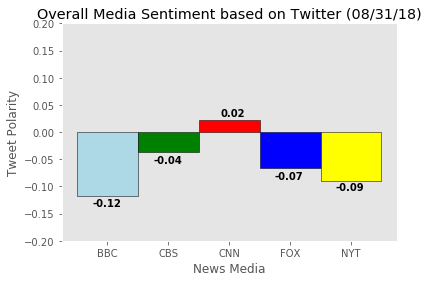

In [9]:
# Create lists with the heights of each bar and bar labels
heights = news_pd.groupby("Account")["Account","Compound"].mean()
bars = ('BBC', 'CBS', 'CNN', 'FOX', 'NYT')
y_pos = np.arange(len(bars))

# Create the bar chart with some formatting options
fig, ax = plt.subplots()
plt.bar(y_pos, heights["Compound"], color=["lightblue", "green", "red", "blue", "yellow"], edgecolor="black", width=1)
plt.xticks(y_pos, bars)

# Add the values of each bar
for h, v in enumerate(round(heights["Compound"],2)):
    if v > 0:
        ax.text(h - .15, v + .01, str(v), color='black', fontweight='bold')
    else:
        ax.text(h - .25, v - .017, str(v), color='black', fontweight='bold')

# Set a title for the chart and configure axis
plt.title("Overall Media Sentiment based on Twitter (08/31/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Media")
plt.ylim(-0.20,0.20)

# Remove grid
plt.grid(False)

# Save Figure
plt.savefig("Output/news_bar.png")
plt.show()

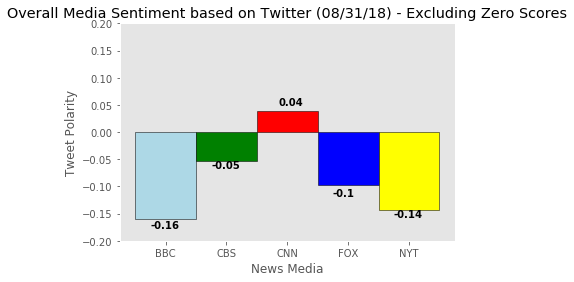

In [10]:
# Create lists with the heights of each bar and bar labels
heights_nozeros = news_pd.loc[news_pd["Compound"] != 0 , :].groupby("Account")["Account","Compound"].mean()
bars = ('BBC', 'CBS', 'CNN', 'FOX', 'NYT')
y_pos = np.arange(len(bars))

# Create the bar chart with some formatting options
fig, ax = plt.subplots()
plt.bar(y_pos, heights_nozeros["Compound"], color=["lightblue", "green", "red", "blue", "yellow"], edgecolor="black", width=1)
plt.xticks(y_pos, bars)

# Add the values of each bar
for h, v in enumerate(round(heights_nozeros["Compound"],2)):
    if v > 0:
        ax.text(h - .15, v + .01, str(v), color='black', fontweight='bold')
    else:
        ax.text(h - .25, v - .017, str(v), color='black', fontweight='bold')

# Set a title for the chart and configure axis
plt.title("Overall Media Sentiment based on Twitter (08/31/18) - Excluding Zero Scores")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Media")
plt.ylim(-0.20,0.20)

# Remove grid
plt.grid(False)

# Save Figure
plt.savefig("Output/news_bar_nozeros.png")
plt.show()